<Mark> ###################################### 07/25/2025 ######################

<Mark> ###############################  Friday ################################

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
cars = pd.read_csv('mtcars2.csv')
cars.head()

,S.No,Unnamed: 1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Drop the 'S.No' column
cars = cars.drop(columns=['S.No'])
cars.rename(columns={'Unnamed: 1': 'Model'}, inplace = True)
cars.head()

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Apply functions

Row wise operation

In [4]:
cars.cyl.head()

,cyl
0,6
1,6
2,4
3,6
4,8


In [5]:
# Multiply the cyl value with 2.
cars.cyl.apply(lambda x: x*2) # We use Lambda X, x takes the row value and multiplies by 2. It is performed on every rows

,cyl
0,12
1,12
2,8
3,12
4,16
5,12
6,16
7,8
8,8
9,12


In [ ]:
# Replace the null values in the qec column
cars.qsec.fillna(cars.qsec.mean(), inplace = True)

In [7]:
# Add a new column (FastCars) to the data frame with 'Yes' or 'No' values
# Criteria for fast is in qsec. Cars with value less than or equal to 16
cars['FastCars'] = cars.qsec.apply(lambda x: 'Yes' if x <= 16 else 'No')

In [8]:
cars.head() # now you can see Fast Cars

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,FastCars
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,No
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,No
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,No
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,No
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,No


In [9]:
# Running Lambda on multiple columns.
cars[['hp', 'am']].apply(lambda x: x*2).head()

,hp,am
0,220,2
1,220,2
2,186,2
3,220,0
4,350,0


In [10]:
cars[['hp', 'am']].apply(lambda x: x[0]) # only first row is taken into consideration

,0
hp,110
am,1


In [11]:
cars[['hp', 'am']].apply(lambda x: x*3, axis = 1).head() # If you wanted to apply all rows then you have to use axis
                                                         # It is safer to apply function

,hp,am
0,330,3
1,330,3
2,279,3
3,330,0
4,525,0


In [12]:
# Here for every row that is read, I am adding 'hp' and 'mpg' and return it.
def summation(row):
  return row['hp'] + row['mpg']
cars[['hp', 'mpg']].apply(summation, axis=1).head()

,0
0,131.0
1,131.0
2,115.8
3,131.4
4,193.7


** Joins and Merges **

In [ ]:
df_employees = pd.DataFrame({'Emp_Id': [101, 102, 103, 104, 105, 106],
                    'emp_name': ['Bob', 'Jake', 'Lisa', 'Sue', 'Eva', 'Mike'],
                    'Dept_Id': [1, 2, 3, 4, None, 1 ]})
df_employees

,Emp_Id,emp_name,Dept_Id
0,101,Bob,1.0
1,102,Jake,2.0
2,103,Lisa,3.0
3,104,Sue,4.0
4,105,Eva,NaN
5,106,Mike,1.0


In [ ]:
df_dept = pd.DataFrame({'Dept_Id': [1, 2, 3, 4, 5],
                    'Dept_Name': ['IT', 'HR', 'Sales', 'Finance', 'Transport']})
df_dept

,Dept_Id,Dept_Name
0,1,IT
1,2,HR
2,3,Sales
3,4,Finance
4,5,Transport


Inner Join

Select only common records from both Data Frame

In [ ]:
pd.merge(df_employees, df_dept, on='Dept_Id', how='inner')

,Emp_Id,emp_name,Dept_Id,Dept_Name
0,101,Bob,1.0,IT
1,102,Jake,2.0,HR
2,103,Lisa,3.0,Sales
3,104,Sue,4.0,Finance
4,106,Mike,1.0,IT


Left Join

It select all the rows from the left Data Frame and the matching rows from the right Data Frame

In [ ]:
pd.merge(df_employees, df_dept, on='Dept_Id', how='left')

,Emp_Id,emp_name,Dept_Id,Dept_Name
0,101,Bob,1.0,IT
1,102,Jake,2.0,HR
2,103,Lisa,3.0,Sales
3,104,Sue,4.0,Finance
4,105,Eva,NaN,NaN
5,106,Mike,1.0,IT


Right Join

It select all the rows from the Right dataframe and the matching rows from the Left DataFrame

In [ ]:
pd.merge(df_employees, df_dept, on='Dept_Id', how='right')

,Emp_Id,emp_name,Dept_Id,Dept_Name
0,101.0,Bob,1.0,IT
1,106.0,Mike,1.0,IT
2,102.0,Jake,2.0,HR
3,103.0,Lisa,3.0,Sales
4,104.0,Sue,4.0,Finance
5,NaN,NaN,5.0,Transport


Multiple Sheet in CSV

Examle of joining two sheets in a same file

In [ ]:
# When you have two or more sheets while loading the data
# df1 = pd.read_csv('filename.csv', sheet_name='sheet1')
# df2 = pd.read_csv('filename.csv', sheet_name='sheet2')
# Then merge these two
# df_merge = pd.merge(df1, df2, on='common_col', how='inner')

Full Outer Join

In [ ]:
pd.merge(df_employees, df_dept, on='Dept_Id', how='outer')

,Emp_Id,emp_name,Dept_Id,Dept_Name
0,101.0,Bob,1.0,IT
1,106.0,Mike,1.0,IT
2,102.0,Jake,2.0,HR
3,103.0,Lisa,3.0,Sales
4,104.0,Sue,4.0,Finance
5,NaN,NaN,5.0,Transport
6,105.0,Eva,NaN,NaN


Grouping and Aggregations

When doing this, you should need to remove the text data. Mathematical operations cannot be performed on text data

In [13]:
cars.drop(columns=['Model'], inplace = True)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,FastCars
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,No
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,No
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,No
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,No
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,No


In [14]:
cars.drop(columns=['FastCars'], inplace = True)

In [15]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Group by cylinder column

In [16]:
# Group by Cylinder
cars.groupby('cyl').mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,18.862696,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.613547,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [17]:
cars.groupby('cyl').mean()[['disp', 'mpg', 'hp']] # Here you can select the fields

,disp,mpg,hp
cyl,,,
4,105.136364,26.663636,82.636364
6,183.314286,19.742857,122.285714
8,353.100000,15.100000,209.214286


In [18]:
# Group by more than one level
cars.groupby(['cyl', 'hp']).mean()[['disp', 'mpg']] # You cannot select 'cyl' and 'hp' in the column selection. As it become a part of the index

disp        mpg
cyl hp                        
4   52    75.700000  30.400000
    62   146.700000  24.400000
    65    71.100000  33.900000
    66    78.850000  29.850000
    91   120.300000  26.000000
    93   108.000000  22.800000
    95   140.800000  22.800000
    97   120.100000  21.500000
    109  121.000000  21.400000
    113   95.100000  30.400000
6   105  225.000000  18.100000
    110  192.666667  21.133333
    123  167.600000  18.500000
    175  145.000000  19.700000
8   150  311.000000  15.350000
    175  380.000000  18.950000
    180  275.800000  16.300000
    205  472.000000  10.400000
    215  460.000000  10.400000
    230  440.000000  14.700000
    245  355.000000  13.800000
    264  351.000000  15.800000
    335  301.000000  15.000000

In [19]:
cars.groupby(['cyl', 'gear']).count() # Here we are doing operation on rows. This will give you the number of cars for each level
                                      #

mpg  disp  hp  drat  wt  qsec  vs  am  carb
cyl gear                                             
4   3       1     1   1     1   1     1   1   1     1
    4       8     8   8     8   8     8   8   8     8
    5       2     2   2     2   2     2   2   2     2
6   3       2     2   2     2   2     2   2   2     2
    4       4     4   4     4   4     4   4   4     4
    5       1     1   1     1   1     1   1   1     1
8   3      12    12  12    12  12    12  12  12    12
    5       2     2   2     2   2     2   2   2     2

In [20]:
cars.groupby(['cyl', 'gear']).mean() # Here it will calculate the average

mpg        disp          hp      drat        wt       qsec   vs  \
cyl gear                                                                       
4   3     21.500  120.100000   97.000000  3.700000  2.465000  20.010000  1.0   
    4     26.925  102.625000   76.000000  4.110000  2.378125  19.234957  1.0   
    5     28.200  107.700000  102.000000  4.100000  1.826500  16.800000  0.5   
6   3     19.750  241.500000  107.500000  2.920000  3.337500  18.557414  1.0   
    4     19.750  163.800000  116.500000  3.910000  3.093750  17.670000  0.5   
    5     19.700  145.000000  175.000000  3.620000  2.770000  15.500000  0.0   
8   3     15.050  357.616667  194.166667  3.120833  4.104083  17.142500  0.0   
    5     15.400  326.000000  299.500000  3.880000  3.370000  14.550000  0.0   

            am      carb  
cyl gear                  
4   3     0.00  1.000000  
    4     0.75  1.500000  
    5     1.00  2.000000  
6   3     0.00  1.000000  
    4     0.50  4.000000  
    5     1.00  6.000000  
8   3     0.00  3.083333  
    5     1.00  6.000000

Pivot Tables

This is nothing but grouping and it is called pivot in Excel

In [21]:
# Pivot with no agg function
cars.pivot_table(values='hp', index='cyl', columns='gear') # Here data is grouped by 'cyl' (rows) and 'gear' (Column). For values mpg selected
                                                            # here the aggregate is the default
                                                            # 97.0000 is the average hp for cars with 4 clyinder and 3 gears
                                                            # 76.0 is the average hp for cars with 4 clyinder and 4 gears

gear,3,4,5
cyl,,,
4,97.000000,76.0,102.0
6,107.500000,116.5,175.0
8,194.166667,NaN,299.5


In [22]:
cars.pivot_table(values='hp', index='cyl', columns='gear', aggfunc='mean')

gear,3,4,5
cyl,,,
4,97.000000,76.0,102.0
6,107.500000,116.5,175.0
8,194.166667,NaN,299.5


In [23]:
# Another example
cars.pivot_table(values='hp', index='cyl', columns='gear', aggfunc='count')

gear,3,4,5
cyl,,,
4,1.0,8.0,2.0
6,2.0,4.0,1.0
8,12.0,NaN,2.0


# <mark> matplotlib

In [24]:
# Load Libraries
import matplotlib.pyplot as plt

In [25]:
# first look at the hp column
cars.hp # you will have 32 rows which shows hp for each cars
        # By default it will take index as the x axis and hp has the y axis
        # 0,1 ,2, 3,.....31 are the values for the x-axis
        # 110, 110,..335 are the values for the y-axis

,hp
0,110
1,110
2,93
3,110
4,175
5,105
6,245
7,62
8,95
9,123


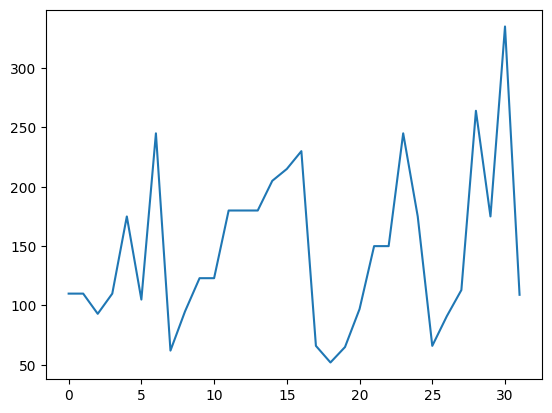

In [26]:
# plot hp
plt.plot(cars['hp']) # on the left (y axis) is the hp and the bottom (x axis) is the car (1 row per car)

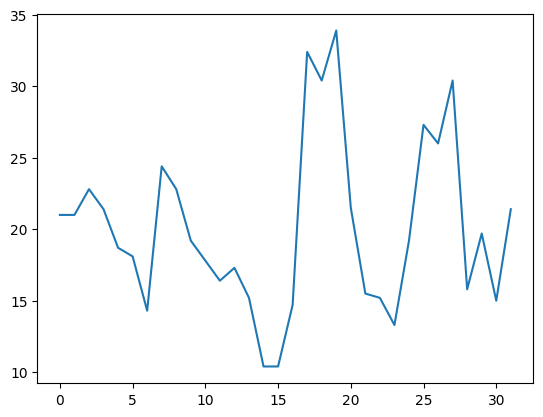

In [27]:
# Plot mpg
plt.plot(cars['mpg'])
plt.show()

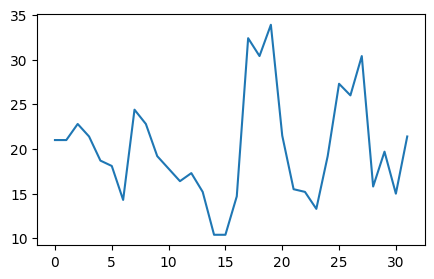

In [39]:
# The above graph is hard to read and big. We can control the figure size
plt.figure(figsize=(5,3)) # Here we 5 unites in x and 3 units in y). Here unit is the length.
                          # Play with the figsize value to get the size that appeals you. Do not over stretch
plt.plot(cars['mpg'])

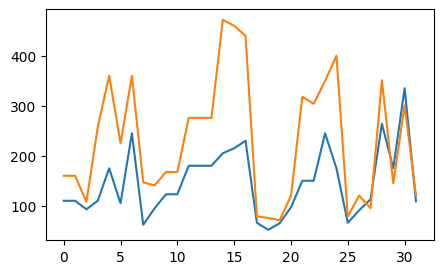

In [43]:
# More than one visualization
plt.figure(figsize=(5,3))
plt.plot(cars['hp'])
plt.plot(cars['disp'])
plt.show()

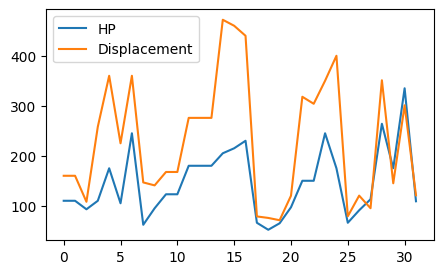

In [44]:
# Looking at the above visual, it is hard to determine which graph represents what data
# Hence this requires label
plt.figure(figsize=(5,3))
plt.plot(cars['hp'], label = 'HP')
plt.plot(cars['disp'], label = 'Displacement')
plt.legend(loc='best') # For 'Best' the legend location will be determined by the system.
plt.show()
plt.show()

**Stack Plot **

whenever you draw a line plot, the area under the line is filled with color

In excel it is caller area plot.

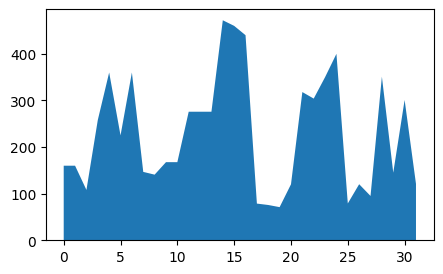

In [52]:
plt.figure(figsize=(5,3))
x = cars['disp'].index
y = cars['disp']
plt.stackplot(x, y)
plt.show()


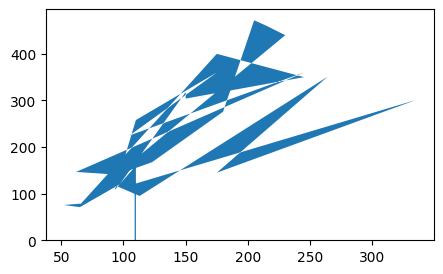

In [55]:
plt.figure(figsize=(5,3))
plt.stackplot(cars['hp'], cars['disp'])
plt.show()

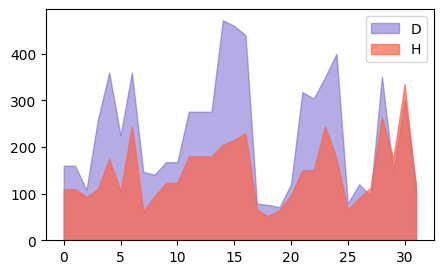

In [71]:
# Here we are putting more than one graph
plt.figure(figsize=(5,3))
x = cars['disp'].index # You're assigning the index of the 'disp' column as your x values.
                       # But in reality, you're grabbing the index of the whole DataFrame — and not just 'disp'.
disp = cars['disp']
hp = cars['hp']                                                               # google color picker
plt.stackplot(x, disp, labels = 'Displacement', color='slateblue', alpha=0.5) # alpha determines the transparency, ranges between 0 to 1
                                                                            # 0 is fully transparent and 1 is fully opaque
plt.stackplot(x, hp, labels = 'HP', color='tomato', alpha=0.7)
plt.legend(loc='best')
plt.show()

*Bar Chart*

Bar chart for number of cylnder in various car

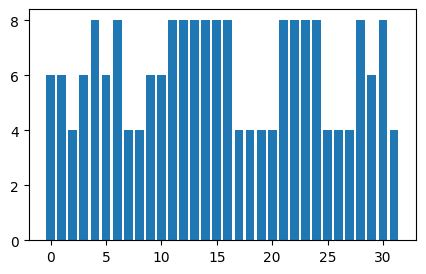

In [72]:
# From the cars data frame. X = cars (32 cars) and y = number of clynder
plt.figure(figsize=(5,3))
#x = cars['cyl'].value_counts().index
x = cars['cyl'].index
#y = cars['cyl'].value_counts()
y = cars.cyl
plt.bar(x, y)
plt.show()

In [80]:
# The visualization you can tell name of car and number of clynder.
# We can copy the raw data
cars1 = pd.read_csv('mtcars2.csv')
cars1.drop(columns=['S.No'], inplace = True)
cars1.rename(columns={'Unnamed: 1': 'Model'}, inplace = True)
cars1.fillna(cars1.qsec.mean(), inplace = True)
cars1.head()

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


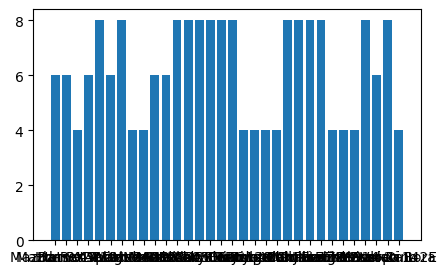

In [82]:
# Cars are in X axis and it cannot fit all the 32 names.
plt.figure(figsize=(5,3))

x = cars1.Model
y = cars1.cyl

plt.bar(x, y)
plt.show()

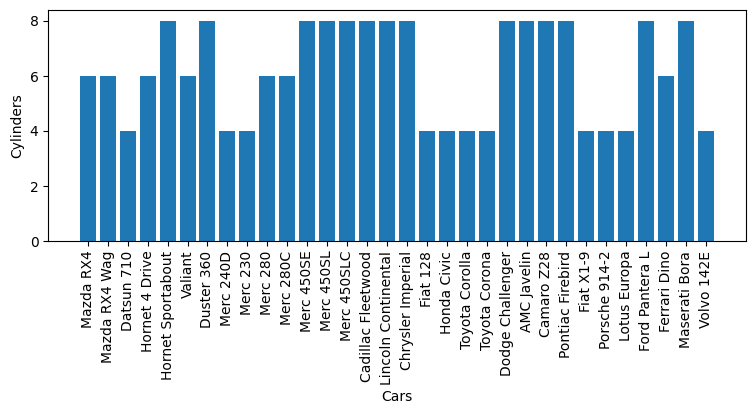

In [89]:
# In the above you see all the car names are all over printed and not readable.
# Ticks are nothing but the values on the axis. 2, 4, 6, 8 are yticks and names are xticks
# You can also label the axis
plt.figure(figsize=(9,3))

x = cars1.Model
y = cars1.cyl

plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Cars')
plt.ylabel('Cylinders')
plt.show()

*Horizontal Bar Chart*

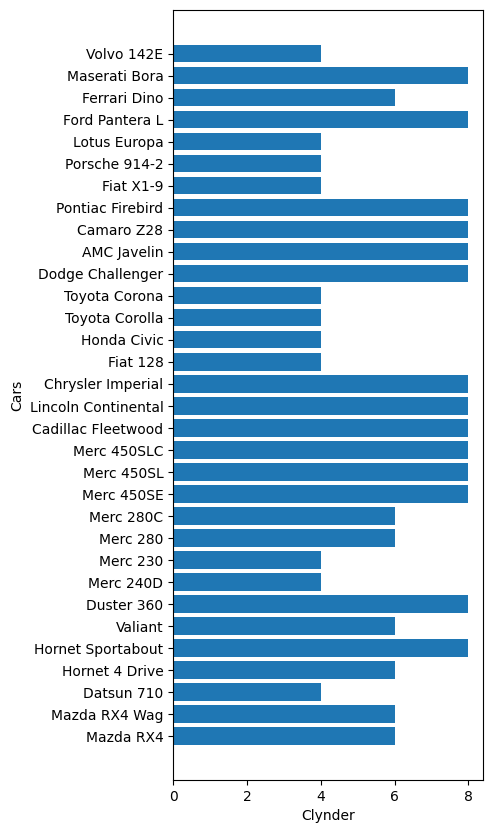

In [100]:
plt.figure(figsize=(4,10))
x = cars1.Model
y = cars1.cyl

plt.barh(x, y)
plt.xticks(rotation=0)
plt.xlabel('Clynder')
plt.yticks(rotation=0)
plt.ylabel('Cars')
plt.show()

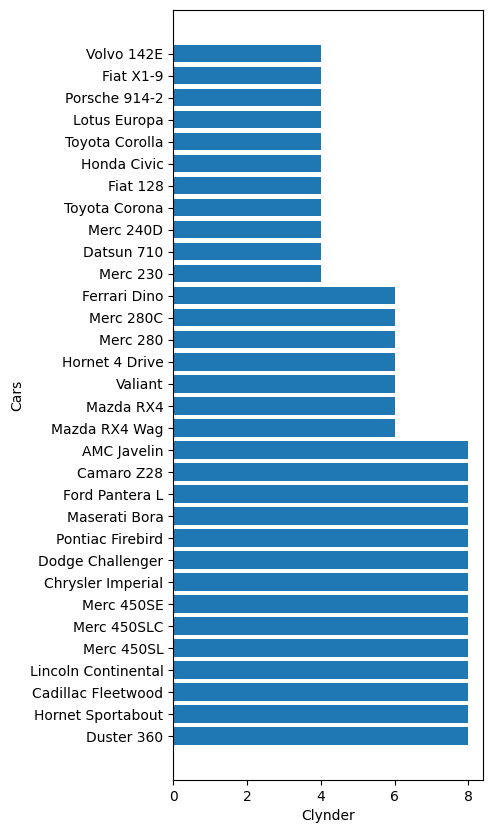

In [104]:
# You can sort it either ascending or descending
plt.figure(figsize=(4,10))
x = cars1.sort_values(by =['cyl'], ascending=False) ['Model']
y = cars1.sort_values(by =['cyl'], ascending=False) ['cyl']

plt.barh(x, y)
plt.xticks(rotation=0)
plt.xlabel('Clynder')
plt.yticks(rotation=0)
plt.ylabel('Cars')
plt.show()

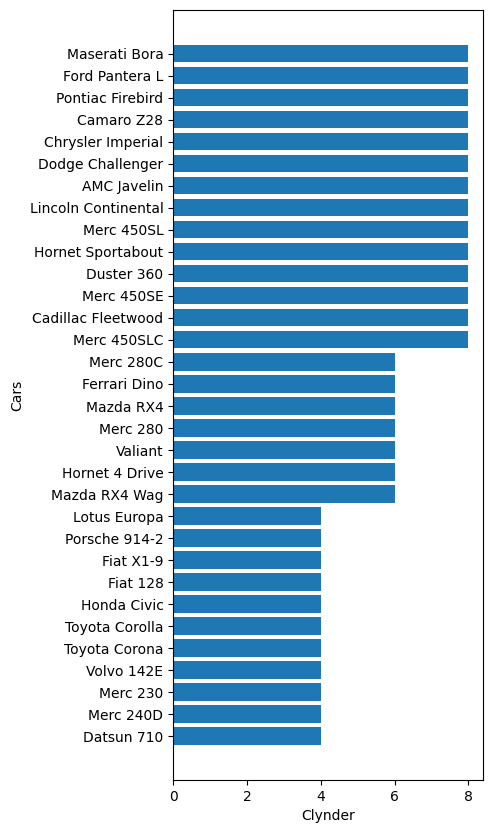

In [105]:
# Below is ascending
plt.figure(figsize=(4,10))
x = cars1.sort_values(by =['cyl']) ['Model']
y = cars1.sort_values(by =['cyl']) ['cyl']

plt.barh(x, y)
plt.xticks(rotation=0)
plt.xlabel('Clynder')
plt.yticks(rotation=0)
plt.ylabel('Cars')
plt.show()

*Scatter Plot*

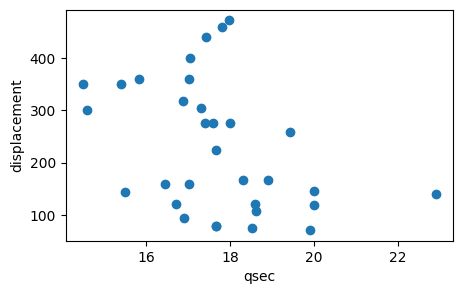

In [109]:
plt.figure(figsize=(5,3))
plt.scatter(cars.qsec, cars.disp)
plt.xlabel('qsec')
plt.ylabel('displacement')
plt.show()

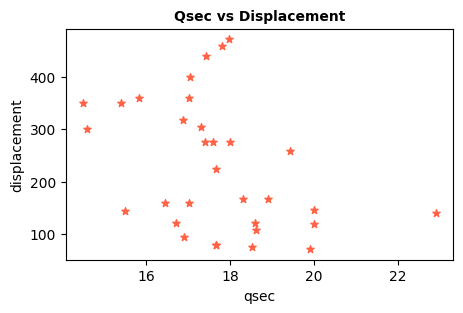

In [113]:
# Aesthetic
plt.figure(figsize=(5,3))
plt.title('Qsec vs Displacement', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.scatter(cars.qsec, cars.disp, s=30, marker='*', color= 'tomato') # Here you are controlling the size of the dot
                                                    # Marker helps you put various shapes. ^ = Triangle, * = Stars
                                                    # Color you can take it from color picker
plt.xlabel('qsec')
plt.ylabel('displacement')
plt.show()



*Subplots*


Helpful to create two plots side by side

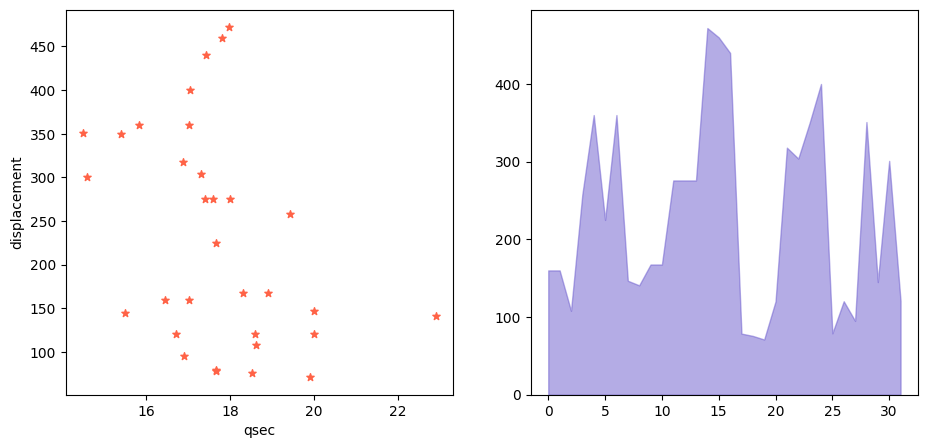

In [126]:
plt.figure(figsize=(11,5))  # here the measurement is for 2 plots, it includes the distance between two plots

#Subplot 1
plt.subplot(1,2,1) # 1 row, 2 columns, and the 1 represents the plot number
plt.scatter(cars.qsec, cars.disp, s=30, marker = '*', color='tomato')
plt.xlabel('qsec')
plt.ylabel('displacement')

#Subplot 2
plt.subplot(1,2,2) # 1 row, 2 columns, and the 2 represents the plot number
plt.stackplot(cars.disp.index, cars.disp, labels = 'Displacement', color='slateblue', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

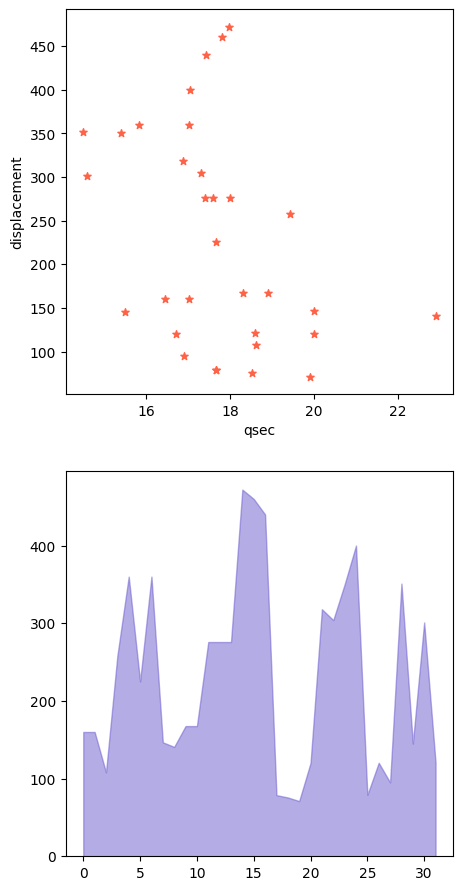

In [124]:
# you can also diplay top of each other
plt.figure(figsize=(5, 11))  # here the measurement is for 2 plots, it includes the distance between two plots

#Subplot 1
plt.subplot(2,1,1) # 1 row, 2 columns, and the 1 represents the plot number
plt.scatter(cars.qsec, cars.disp, s=30, marker = '*', color='tomato')
plt.xlabel('qsec')
plt.ylabel('displacement')

#Subplot 2
plt.subplot(2,1,2) # 1 row, 2 columns, and the 2 represents the plot number
plt.stackplot(cars.disp.index, cars.disp, labels = 'Displacement', color='slateblue', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

*Histogram*

Histogram are the distribution plot

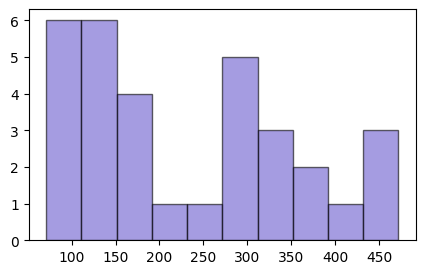

In [130]:
plt.figure(figsize=(5, 3))
plt.hist(cars.disp, color='slateblue', alpha=0.6, edgecolor='black')
plt.show()

In [132]:
# How many cars are there within the range
cars.disp.min(), cars.disp.max()

(71.1, 472.0)

In [133]:
np.linspace(cars.disp.min(), cars.disp.max(), 5)

array([ 71.1  , 171.325, 271.55 , 371.775, 472.   ])

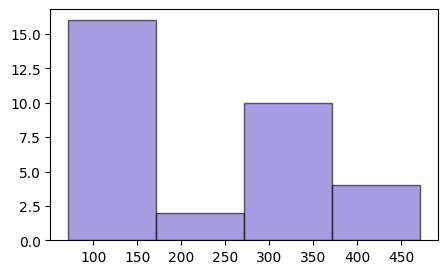

In [140]:
plt.figure(figsize=(5, 3))
bin_values = np.linspace(cars.disp.min(), cars.disp.max(), 5) #(gives the spalace between each values)
plt.hist(cars.disp, color='slateblue', alpha=0.6, edgecolor='black', bins=bin_values)
plt.show();

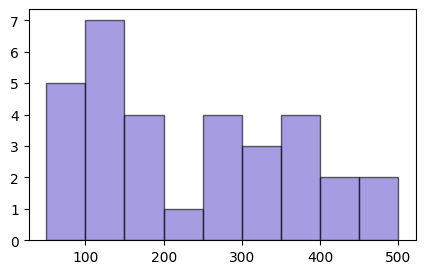

In [141]:
plt.figure(figsize=(5, 3))
bin_values = np.arange(50, 501, 50) #( generates arrays with evenly spaced values within a given interval)
plt.hist(cars.disp, color='slateblue', alpha=0.6, edgecolor='black', bins=bin_values)
plt.show();

*Box Plot*

it is a visualization which will show all the percentile

A box plot (also called a box-and-whisker plot) is a great way to visualize the spread, center, and outliers of a numerical dataset. It’s compact, powerful, and ideal for comparing distributions across categories.


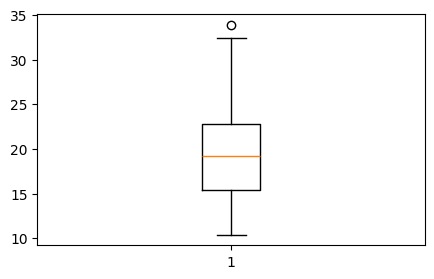

In [143]:
plt.figure(figsize=(5,3))
plt.boxplot(cars.mpg)
plt.show()

# Bottom bar is the minimum value and the top bar is he maximum value. Center bar (yellow) is the mean value (within the box)
# Below the mean bar is the 25th Percentile and above the mean bar is the 75th percentile
# Outliers will be in dot (Abormally high and low values)
# Here the most of the data ranges between 0 to 35. Box specifies where the bulk of the data is located

*Viloin Plot*

 A violin plot is like a box plot but with added flair—it gives you a richer picture of the distribution by blending summary stats with density curves

A violin plot combines the concise structure of a box plot with a kernel density estimate (KDE). It shows the distribution shape—how values are spread out and concentrated—and highlights both central tendency and variability.



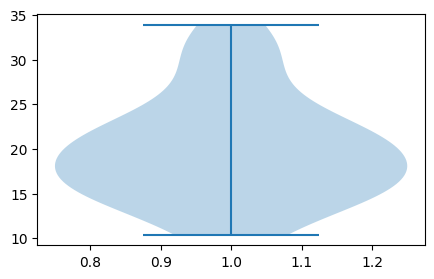

In [144]:
plt.figure(figsize=(5,3))
plt.violinplot(cars.mpg)
plt.show()

# It is a mirror effect

Pie chart

A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportions. Each slice’s angle and size correspond to its value relative to the total.

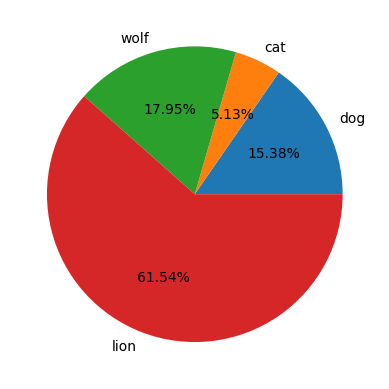

In [147]:
animals = ['dog', 'cat', 'wolf', 'lion']
weights = [30, 10, 35, 120]
plt.pie(weights, labels=animals, autopct='%1.2f%%')   # 1.2f = 2 decimal float value
plt.show()